In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
num = pd.read_csv('rmpCapstoneNum.csv', header=None)
qual = pd.read_csv('rmpCapstoneQual.csv', header=None)
tag = pd.read_csv('rmpCapstoneTags.csv', header=None)

In [3]:
num_columns = [
    "Average Rating",            # The arithmetic mean of all individual quality ratings of this professor
    "Average Difficulty",        # The arithmetic mean of all individual difficulty ratings of this professor
    "Number of Ratings",         # Total number of ratings these averages are based on
    "Received a 'pepper'?",      # Boolean - judged as "hot" by the students
    "Proportion Retake",         # Proportion of students that said they would take the class again
    "Online Ratings Count",      # Number of ratings coming from online classes
    "Male Gender",               # Boolean – 1: determined with high confidence that professor is male
    "Female Gender"              # Boolean – 1: determined with high confidence that professor is female
]
num.columns = num_columns

In [4]:
qual_columns = [
    "Major/Field",  # Column 1: Major/Field
    "University",   # Column 2: University
    "US State"      # Column 3: US State (2-letter abbreviation)
]
qual.columns = qual_columns

In [5]:
tags_columns = [
    "Tough grader",              # Column 1
    "Good feedback",             # Column 2
    "Respected",                 # Column 3
    "Lots to read",              # Column 4
    "Participation matters",     # Column 5
    "Don't skip class",          # Column 6
    "Lots of homework",          # Column 7
    "Inspirational",             # Column 8
    "Pop quizzes!",              # Column 9
    "Accessible",                # Column 10
    "So many papers",            # Column 11
    "Clear grading",             # Column 12
    "Hilarious",                 # Column 13
    "Test heavy",                # Column 14
    "Graded by few things",      # Column 15
    "Amazing lectures",          # Column 16
    "Caring",                    # Column 17
    "Extra credit",              # Column 18
    "Group projects",            # Column 19
    "Lecture heavy"              # Column 20
]
tag.columns = tags_columns

In [6]:
num.head()

,Average Rating,Average Difficulty,Number of Ratings,Received a 'pepper'?,Proportion Retake,Online Ratings Count,Male Gender,Female Gender
0,5.0,1.5,2.0,0.0,NaN,0.0,0,1
1,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,3.2,3.0,4.0,0.0,NaN,0.0,1,0
3,3.6,3.5,10.0,1.0,NaN,0.0,0,0
4,1.0,5.0,1.0,0.0,NaN,0.0,0,0


In [7]:
qual.head()

,Major/Field,University,US State
0,Criminal Justice,George Mason University,VA
1,NaN,NaN,NaN
2,English,Alabama State University,AL
3,English,University of Kentucky,KY
4,English,Keiser University,FL


In [8]:
tag.head()

,Tough grader,Good feedback,Respected,Lots to read,Participation matters,Don't skip class,Lots of homework,Inspirational,Pop quizzes!,Accessible,So many papers,Clear grading,Hilarious,Test heavy,Graded by few things,Amazing lectures,Caring,Extra credit,Group projects,Lecture heavy
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1,2,1,0,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,3,0,0,2,4,2,1,0,0,0,2,1,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


9. Build a regression model predicting average difficulty from all tags (the ones in the rmpCapstoneTags.csv) file. Make sure to include the R2and RMSE of this model. Which of these tags is most strongly predictive of average difficulty? Hint: Make sure to address collinearity concerns

In [9]:
# Ensure the datasets have the same number of records
assert len(num) == len(qual) == len(tag), "Datasets lengths do not match."

# Merge the datasets
merged_df = pd.concat([num, qual, tag], axis=1)


In [10]:
# drop na of average rating 
merged_df = merged_df.dropna(subset=['Average Rating'])
merged_df.head()

,Average Rating,Average Difficulty,Number of Ratings,Received a 'pepper'?,Proportion Retake,Online Ratings Count,Male Gender,Female Gender,Major/Field,University,...,So many papers,Clear grading,Hilarious,Test heavy,Graded by few things,Amazing lectures,Caring,Extra credit,Group projects,Lecture heavy
0,5.0,1.5,2.0,0.0,NaN,0.0,0,1,Criminal Justice,George Mason University,...,0,0,0,0,0,0,0,0,0,1
2,3.2,3.0,4.0,0.0,NaN,0.0,1,0,English,Alabama State University,...,0,0,0,0,0,0,0,0,0,0
3,3.6,3.5,10.0,1.0,NaN,0.0,0,0,English,University of Kentucky,...,0,2,1,0,0,0,0,0,1,0
4,1.0,5.0,1.0,0.0,NaN,0.0,0,0,English,Keiser University,...,0,0,0,0,0,0,0,0,0,0
5,3.5,3.3,22.0,0.0,56.0,7.0,1,0,English,Eastern Florida State College,...,0,7,3,0,0,0,3,0,1,3


In [24]:
# check na
print('before', len(merged_df))
print(merged_df.isnull().sum())
# drop na of proportion retake
merged_df = merged_df.dropna(subset=['Proportion Retake'])
print(merged_df.isnull().sum())# check number of ratings and plot it
print('after', len(merged_df))

before 25368
Average Rating                          0
Average Difficulty                      0
Number of Ratings                       0
Received a 'pepper'?                    0
Proportion Retake                   13208
Online Ratings Count                    0
Male Gender                             0
Female Gender                           0
Major/Field                             0
University                              0
US State                                0
Tough grader                            0
Good feedback                           0
Respected                               0
Lots to read                            0
Participation matters                   0
Don't skip class                        0
Lots of homework                        0
Inspirational                           0
Pop quizzes!                            0
Accessible                              0
So many papers                          0
Clear grading                           0
Hilarious            

count    70004.000000
mean         5.374721
std          8.136628
min          1.000000
25%          1.000000
50%          3.000000
75%          6.000000
max        393.000000
Name: Number of Ratings, dtype: float64


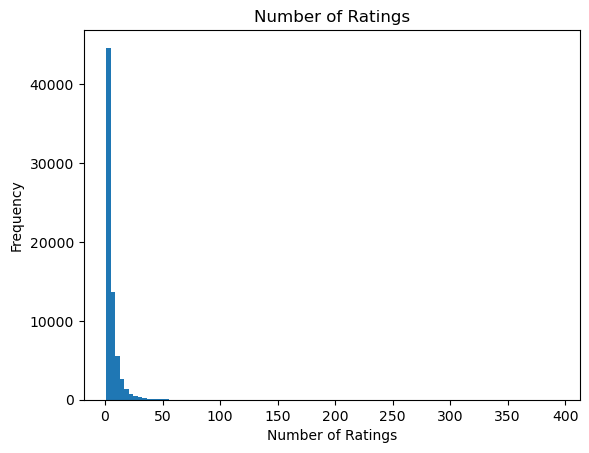

In [11]:
print(merged_df['Number of Ratings'].describe())
plt.hist(merged_df['Number of Ratings'], bins=100)
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.title('Number of Ratings')
plt.show()

In [12]:
# set the threshold to 5 ratings and exclude the professors with less than 5 ratings
print(len(merged_df))
merged_df = merged_df[merged_df['Number of Ratings'] >= 5]
print(len(merged_df))

70004
25368


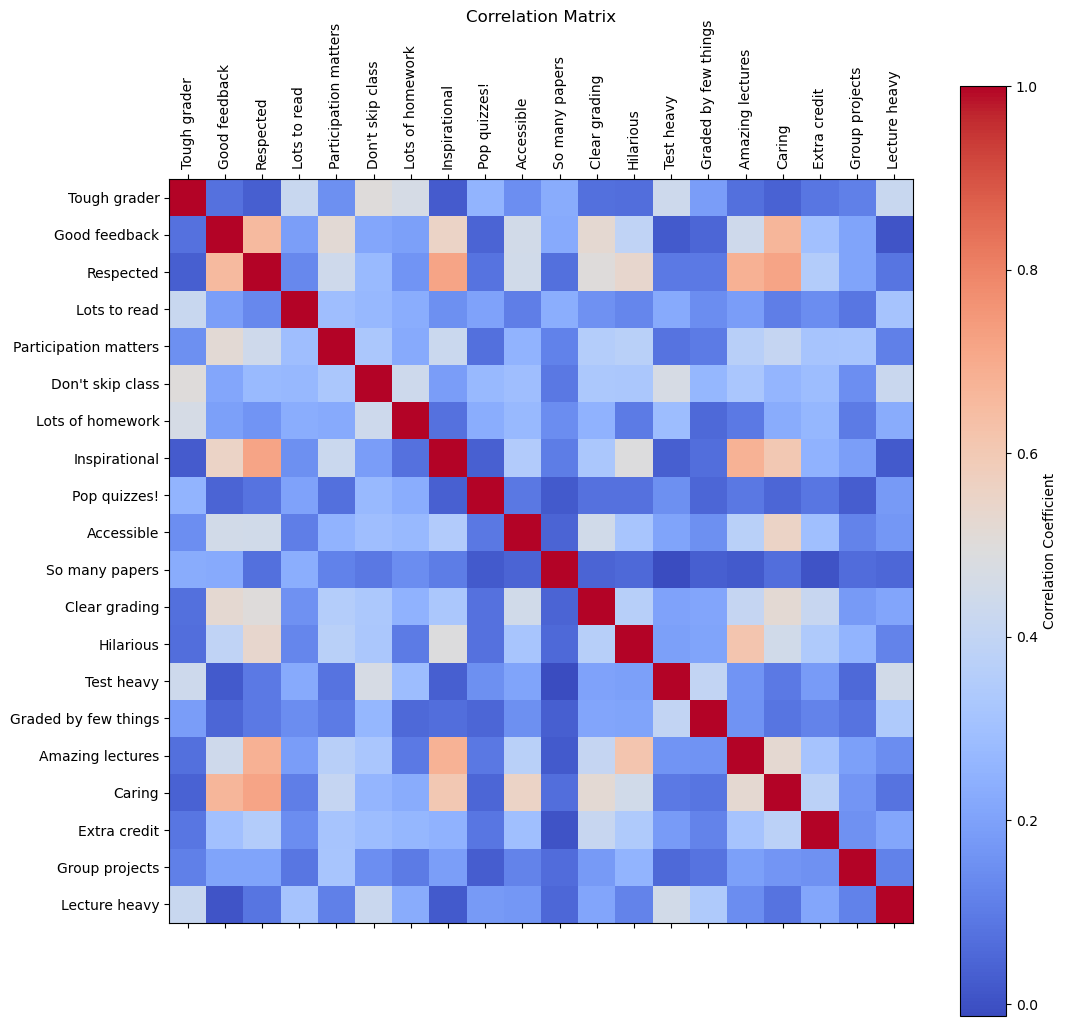

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the correlation matrix
correlation_matrix = merged_df[tags_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 12))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)  # Use a diverging colormap
plt.xticks(range(len(tags_columns)), tags_columns, rotation=90)
plt.yticks(range(len(tags_columns)), tags_columns)
plt.colorbar(label='Correlation Coefficient')  # Add label for clarity
plt.title('Correlation Matrix', y=1.2)  # Add title with some spacing
plt.show()


In [ ]:
import pandas as pd

# Calculate the correlation matrix
correlation_matrix = merged_df[tags_columns].corr()

# Flatten the matrix and sort
correlation_list = (
    correlation_matrix
    .stack()  # Converts the matrix to a Series
    .reset_index()  # Resets the index for sorting
    .rename(columns={0: 'correlation', 'level_0': 'Variable 1', 'level_1': 'Variable 2'})
)

# Remove self-correlations
correlation_list = correlation_list[correlation_list['Variable 1'] != correlation_list['Variable 2']]

# Sort by correlation values (descending)
sorted_correlation_list = correlation_list.sort_values(by='correlation', ascending=False)

# Display the sorted list
print(sorted_correlation_list)

In [15]:
import pandas as pd

# Calculate the correlation matrix
correlation_matrix = merged_df[tags_columns].corr().abs()  # Use absolute values for correlation

# Define a threshold for high correlation
correlation_threshold = 0.7

# Find columns to drop
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
columns_to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > correlation_threshold)]

# Create a new DataFrame with dropped columns
reduced_df = merged_df.drop(columns=columns_to_drop)

# Display the columns kept
print(f"Kept columns: {list(reduced_df.columns)}")
print(f"Dropped columns: {columns_to_drop}")


Kept columns: ['Average Rating', 'Average Difficulty', 'Number of Ratings', "Received a 'pepper'?", 'Proportion Retake', 'Online Ratings Count', 'Male Gender', 'Female Gender', 'Major/Field', 'University', 'US State', 'Tough grader', 'Good feedback', 'Respected', 'Lots to read', 'Participation matters', "Don't skip class", 'Lots of homework', 'Pop quizzes!', 'Accessible', 'So many papers', 'Clear grading', 'Hilarious', 'Test heavy', 'Graded by few things', 'Amazing lectures', 'Extra credit', 'Group projects', 'Lecture heavy']
Dropped columns: ['Inspirational', 'Caring']


In [16]:
# For each tag column
for tag_column in tags_columns:
    # Create new normalized column
    merged_df[f'{tag_column}_normalized'] = merged_df[tag_column] / merged_df['Number of Ratings']
# create a list of normalized cols
normalized_columns = [f'{tag_column}_normalized' for tag_column in tags_columns]

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# 1. Prepare features properly - include all relevant columns
feature_columns = (
    normalized_columns
)

X = merged_df[feature_columns]
y = merged_df['Average Rating']

# 2. Single train-test split for fair comparison
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Model definitions with proper parameter grids
# expand the parameter grid for better tuning to 1e4
ridge_params = {'alpha': np.logspace(-3, 4, 50)} 
lasso_params = {'alpha': np.logspace(-3, 3, 50)}
rf_params = {
    'n_estimators': [100, 200],  # Start with a small range of trees
    'max_depth': [None, 10, 20],  # Explore no limit and shallow trees
    'min_samples_split': [2, 5],  # Control the size of splits
    'min_samples_leaf': [1, 2],  # Control the minimum number of samples in leaves
    'max_features': ['sqrt'],  # Default for regression tasks
}

# 5. Initialize models
ridge = Ridge(random_state=42)
lasso = Lasso(random_state=42)
rf = RandomForestRegressor(random_state=42)

# 6. Train models with cross-validation
ridge_cv = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
lasso_cv = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
rf_cv = GridSearchCV(rf, rf_params, cv=5, scoring='neg_mean_squared_error')

# 7. Fit models
models = {
    'Ridge': ridge_cv,
    'Lasso': lasso_cv,
    'Random Forest': rf_cv
}

results = {}
for name, model in models.items():
    # Fit
    model.fit(X_train_scaled, y_train)
    
    # Predict
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'RMSE': rmse,
        'R2': r2,
        'Best Params': model.best_params_
    }

# 8. Display results
results_df = pd.DataFrame.from_dict(results, orient='index')
print("\nModel Performance Results:")
print(results_df[['RMSE', 'R2']])

print("\nBest Parameters:")
for model_name, result in results.items():
    print(f"\n{model_name}:")
    print(result['Best Params'])


Model Performance Results:
                   RMSE        R2
Ridge          0.517404  0.699631
Lasso          0.516987  0.700115
Random Forest  0.474692  0.747176

Best Parameters:

Ridge:
{'alpha': 19.306977288832496}

Lasso:
{'alpha': 0.001}

Random Forest:
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


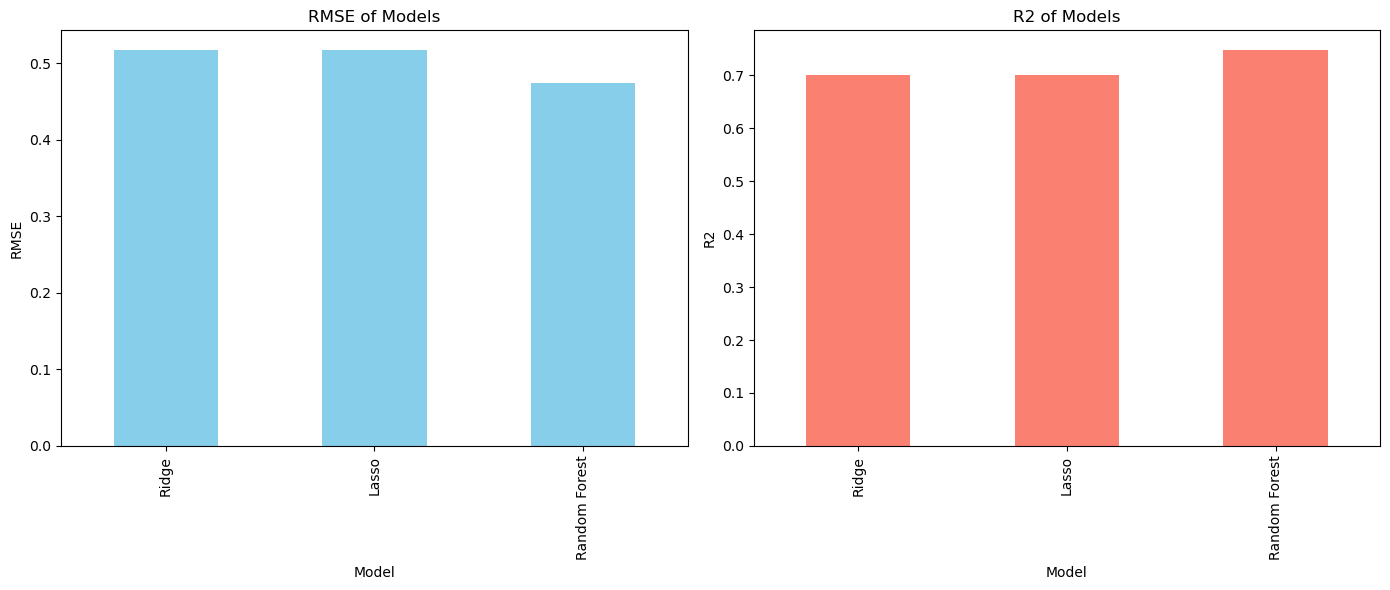

In [18]:
# create a visualization of the results
import matplotlib.pyplot as plt

# Extract RMSE and R2 values
rmse_values = results_df['RMSE']
r2_values = results_df['R2']

# Create a figure and axis
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot RMSE
rmse_values.plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title('RMSE of Models')
ax[0].set_ylabel('RMSE')
ax[0].set_xlabel('Model')

# Plot R2
r2_values.plot(kind='bar', ax=ax[1], color='salmon')
ax[1].set_title('R2 of Models')
ax[1].set_ylabel('R2')
ax[1].set_xlabel('Model')

# Display the plot
plt.tight_layout()
plt.show()

Build a classification model that predicts whether a professor receives a “pepper” from all available factors(both tags and numerical). Make sure to include model quality metrics such as AU(RO)C and also address class imbalanceconcerns.

In [29]:
x_cols = list(set(tags_columns).union(set(num_columns)))
x_cols.remove("Received a 'pepper'?")
y = merged_df["Received a 'pepper'?"]
X = merged_df[x_cols]

In [30]:
# check y class count
y.value_counts()

Received a 'pepper'?
0.0    6494
1.0    5666
Name: count, dtype: int64


Training Logistic Regression...


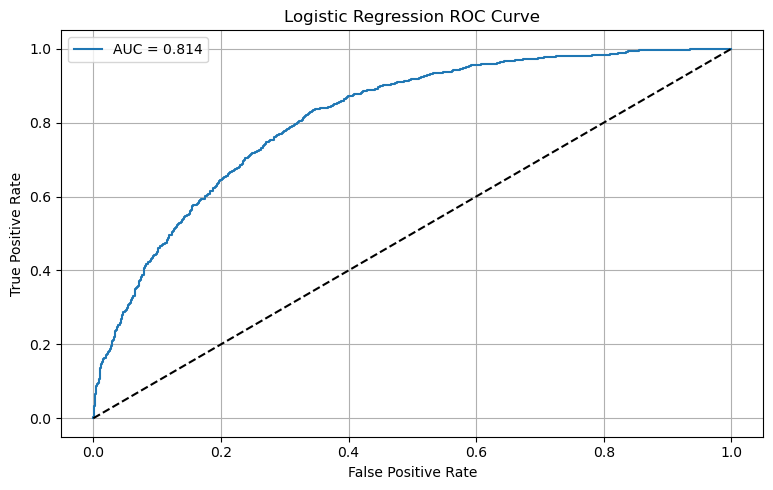

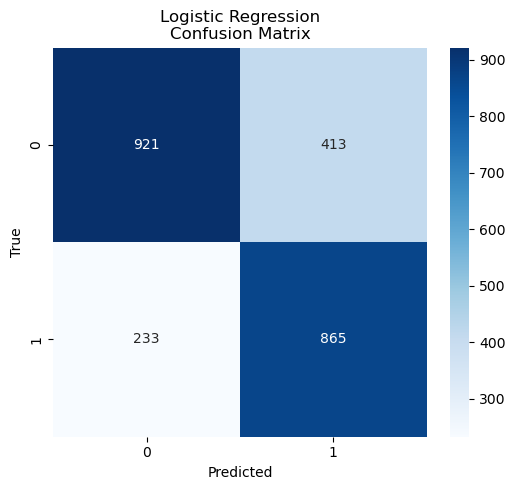

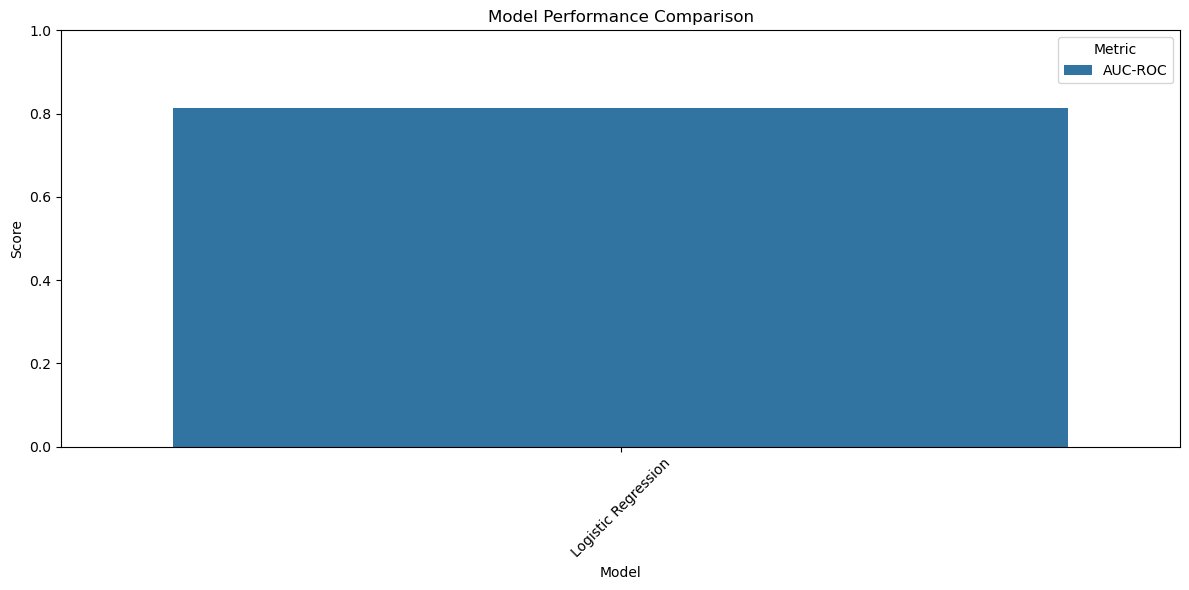


Model Performance Summary:
                     AUC-ROC
Logistic Regression    0.814

Best Model (Logistic Regression) Details:
Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'solver': 'lbfgs'}

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.69      0.74      1334
         1.0       0.68      0.79      0.73      1098

    accuracy                           0.73      2432
   macro avg       0.74      0.74      0.73      2432
weighted avg       0.74      0.73      0.73      2432



In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, 
                            AdaBoostClassifier)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (roc_curve, roc_auc_score, precision_recall_curve, 
                           average_precision_score, classification_report, 
                           confusion_matrix)
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 3. Scale features and apply SMOTE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# 4. Define expanded set of models with parameter grids
models = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42),
        'params': {
            'C': [0.001, 0.01, 0.1, 1, 10],
            'class_weight': ['balanced', None],
            'solver': ['lbfgs', 'liblinear']
        }
    },
    # 'Random Forest': {
    #     'model': RandomForestClassifier(random_state=42),
    #     'params': {
    #         'n_estimators': [100, 200],
    #         'max_depth': [10, 20, None],
    #         'min_samples_split': [2, 5],
    #         'class_weight': ['balanced', None]
    #     }
    # },
    # 'Gradient Boosting': {
    #     'model': GradientBoostingClassifier(random_state=42),
    #     'params': {
    #         'n_estimators': [100, 200],
    #         'learning_rate': [0.01, 0.1],
    #         'max_depth': [3, 5]
    #     }
    # },
    # 'XGBoost': {
    #     'model': XGBClassifier(random_state=42),
    #     'params': {
    #         'n_estimators': [100, 200],
    #         'learning_rate': [0.01, 0.1],
    #         'max_depth': [3, 5],
    #         'scale_pos_weight': [1, 3]
    #     }
    # },
    # 'AdaBoost': {
    #     'model': AdaBoostClassifier(random_state=42),
    #     'params': {
    #         'n_estimators': [50, 100],
    #         'learning_rate': [0.01, 0.1, 1.0]
    #     }
    # },
    # 'Decision Tree': {
    #     'model': DecisionTreeClassifier(random_state=42),
    #     'params': {
    #         'max_depth': [5, 10, None],
    #         'min_samples_split': [2, 5],
    #         'class_weight': ['balanced', None]
    #     }
    # },
    # 'KNN': {
    #     'model': KNeighborsClassifier(),
    #     'params': {
    #         'n_neighbors': [3, 5, 7],
    #         'weights': ['uniform', 'distance'],
    #         'p': [1, 2]  # Manhattan or Euclidean distance
    #     }
    # },
    # 'SVM': {
    #     'model': SVC(random_state=42, probability=True),
    #     'params': {
    #         'C': [0.1, 1, 10],
    #         'kernel': ['rbf', 'linear'],
    #         'class_weight': ['balanced', None]
    #     }
    # }
}

# 5. Train and evaluate models
results = {}
predictions = {}

for name, model_info in models.items():
    print(f"\nTraining {name}...")
    
    # Grid search
    grid_search = GridSearchCV(
        model_info['model'],
        model_info['params'],
        cv=5,
        scoring='roc_auc',
        n_jobs=-1
    )
    
    # Fit
    grid_search.fit(X_train_balanced, y_train_balanced)
    
    # Predict
    y_pred_proba = grid_search.predict_proba(X_test_scaled)[:, 1]
    y_pred = grid_search.predict(X_test_scaled)
    
    # Store results
    results[name] = {
        'AUC-ROC': roc_auc_score(y_test, y_pred_proba),
        'Best Params': grid_search.best_params_
    }
    
    predictions[name] = {
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }


# Plot ROC curves (with multiple subplots for better visibility)
n_cols = 2
n_rows = (len(models) + 1) // 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.ravel()

for idx, (name, preds) in enumerate(predictions.items()):
    fpr, tpr, _ = roc_curve(y_test, preds['y_pred_proba'])
    auc = roc_auc_score(y_test, preds['y_pred_proba'])
    
    axes[idx].plot(fpr, tpr, label=f'AUC = {auc:.3f}')
    axes[idx].plot([0, 1], [0, 1], 'k--')
    axes[idx].set_xlabel('False Positive Rate')
    axes[idx].set_ylabel('True Positive Rate')
    axes[idx].set_title(f'{name} ROC Curve')
    axes[idx].legend()
    axes[idx].grid(True)

# Remove empty subplots if any
for idx in range(len(models), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

# Plot confusion matrices
n_cols = 4
n_rows = (len(models) + 3) // 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.ravel()

for idx, (name, preds) in enumerate(predictions.items()):
    cm = confusion_matrix(y_test, preds['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[idx], cmap='Blues')
    axes[idx].set_title(f'{name}\nConfusion Matrix')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('True')

# Remove empty subplots if any
for idx in range(len(models), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

# Create performance comparison bar plot
metrics_df = pd.DataFrame(
    [(name, results[name]['AUC-ROC']) 
     for name in results.keys()],
    columns=['Model', 'AUC-ROC']
).melt(id_vars=['Model'], var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 6))
sns.barplot(data=metrics_df, x='Model', y='Score', hue='Metric')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Print detailed results
print("\nModel Performance Summary:")
print("=" * 50)
summary_df = pd.DataFrame({
    'AUC-ROC': [results[m]['AUC-ROC'] for m in results],
}, index=results.keys())
summary_df = summary_df.sort_values('AUC-ROC', ascending=False)
print(summary_df.round(3))

# Print detailed results for best model
best_model = summary_df.index[0]
print(f"\nBest Model ({best_model}) Details:")
print("=" * 50)
print(f"Best Parameters: {results[best_model]['Best Params']}")
print("\nClassification Report:")
print(classification_report(y_test, predictions[best_model]['y_pred']))

Major/Field
Mathematics               1367
English                   1292
Biology                    739
Psychology                 656
Chemistry                  511
                          ... 
Biblical Worldview           1
Mineral Engineering          1
Communication  Culture       1
Logic  Philosophy            1
Apparel Merchandising        1
Name: count, Length: 554, dtype: int64


/var/folders/dv/_l_gwqk95zdggctvnm04j3780000gn/T/ipykernel_14150/2322520367.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(math_rating, label="Mathematics", color='skyblue', shade=True)
/var/folders/dv/_l_gwqk95zdggctvnm04j3780000gn/T/ipykernel_14150/2322520367.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(english_rating, label="English", color='salmon', shade=True)


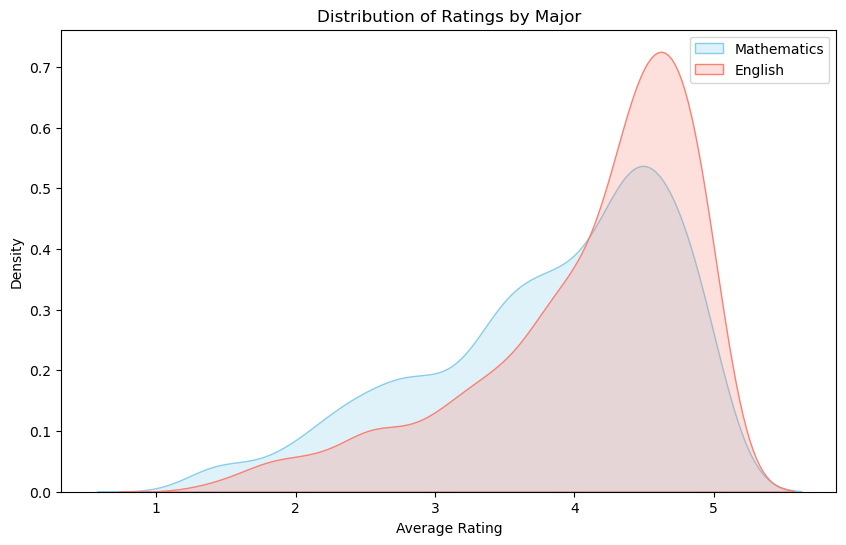

KS Statistic: 0.1538
P-Value: 0.0000
U Statistic: 710200.0000
P-Value: 0.0000


In [ ]:
# Would major affect the rating of a professor?

# see the distribution of major
print(merged_df["Major/Field"].value_counts())

math_rating = merged_df[merged_df["Major/Field"] == "Mathematics"]["Average Rating"]
english_rating = merged_df[merged_df["Major/Field"] == "English"]["Average Rating"]

plt.figure(figsize=(10, 6))
sns.kdeplot(math_rating, label="Mathematics", color='skyblue', shade=True)
sns.kdeplot(english_rating, label="English", color='salmon', shade=True)
plt.xlabel("Average Rating")
plt.ylabel("Density")
plt.title("Distribution of Ratings by Major")
plt.legend()
plt.show()

# KS Statistical test 
from scipy.stats import ks_2samp

# Extract ratings for Mathematics and English majors


# Perform the Kolmogorov-Smirnov test
ks_stat, p_value = ks_2samp(math_rating, english_rating)
print(f"KS Statistic: {ks_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# run mann whitney u test
from scipy.stats import mannwhitneyu

# Perform the Mann-Whitney U test
u_stat, p_value = mannwhitneyu(math_rating, english_rating)
print(f"U Statistic: {u_stat:.4f}")
print(f"P-Value: {p_value:.4f}")